# Pregunta número 1

1.	Las mujeres se enfocan más en analizar los argumentos en comparación a los varones que tienen un análisis más heurístico (Rajdev, 2016), entonces:
o	¿habrá diferencias entre hombres y mujeres en un test que mide la necesidad de cognición (NDC) (el interés en profundizar en argumentos para entenderlos de la mejor manera)? Hipótesis: las mujeres tendrán puntajes más elevados en el test de necesidad de cognición. 

In [7]:
#Librerías que utilicé 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 
import scipy.stats as stats
import seaborn as sns
from scipy.stats import t
import random

In [8]:
#Leo la primera ola de respuestas
data1 = pd.read_csv('data.csv',index_col=False)
#Compruebo que mi data se haya cargado de manera correcta
data1.head(3)

,participant,age:1,gender:1,noticias:1,ndc:1,ndc:2,ndc:3,ndc:4,ndc:5,ndc:6,...,beck:21,previo:1,previo:2,previo:3,previo:4,proximo:1,country,TIME_start,TIME_end,TIME_total
0,s.442dabe3-038d-4177-8093-cad29ab46349.txt,23,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-03-27-21-59,2020-03-27-22-02,3.0
1,s.5eff0105-b85b-43c4-a8e2-ec88898f274a.txt,49,2.0,1.0,3.0,5.0,1.0,1.0,1.0,5.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-04-03-17-37,2020-04-03-18-01,24.0
2,s.2f4f0f16-10f9-4087-91e1-996f25d726ad.txt,18,2.0,1.0,4.0,4.0,1.0,4.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,1.0,"MX, Mexico",2020-04-01-01-12,2020-04-01-01-22,10.0


In [9]:
#Leo la segunda ola de respuestas
data2 = pd.read_csv('nuevo.csv',index_col = False)
#Compruebo que mi data se haya cargado de manera correctoa
data2.head(3)

,participant,age:1,gender:1,noticias:1,cuarentena_1:1,cuarentena_2:1,cuarentena_3:1,ndc:1,ndc:2,ndc:3,...,beck:21,previo:1,previo:2,previo:3,previo:4,proximo:1,country,TIME_start,TIME_end,TIME_total
0,s.dcd89188-069a-4275-8995-09e3e6b45d9b.txt,26.0,1.0,2.0,NaN,NaN,NaN,2.0,4.0,2.0,...,2.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-04-16-22-59,2020-04-16-23-08,9.0
1,s.f9633754-c3b0-4f1b-a23a-d1a0214c06a5.txt,20.0,2.0,3.0,NaN,NaN,NaN,4.0,4.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,"MX, Mexico",2020-04-21-22-09,2020-04-21-22-25,16.0
2,s.28fa4f07-e1c0-4999-bd66-9c594346fae6.txt,27.0,2.0,1.0,NaN,NaN,NaN,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,"MX, Mexico",2020-04-24-02-05,2020-04-24-02-44,39.0


In [10]:
#Al dataset anterior le voy a eliminar las columnas de cuarentena, porque de momento no tienen nada y no nos serviran
data2 = data2.drop(['cuarentena_1:1'],axis = 1)
data2 = data2.drop(['cuarentena_2:1'],axis = 1)
data2 = data2.drop(['cuarentena_3:1'],axis = 1)

In [11]:
#Creo solamente un dataset a partir de ambas olas de respuestas
data = data1.append(data2)
#Compruebo que se haya creado con éxito
data.head()

,participant,age:1,gender:1,noticias:1,ndc:1,ndc:2,ndc:3,ndc:4,ndc:5,ndc:6,...,beck:21,previo:1,previo:2,previo:3,previo:4,proximo:1,country,TIME_start,TIME_end,TIME_total
0,s.442dabe3-038d-4177-8093-cad29ab46349.txt,23,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-03-27-21-59,2020-03-27-22-02,3.0
1,s.5eff0105-b85b-43c4-a8e2-ec88898f274a.txt,49,2.0,1.0,3.0,5.0,1.0,1.0,1.0,5.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-04-03-17-37,2020-04-03-18-01,24.0
2,s.2f4f0f16-10f9-4087-91e1-996f25d726ad.txt,18,2.0,1.0,4.0,4.0,1.0,4.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,1.0,"MX, Mexico",2020-04-01-01-12,2020-04-01-01-22,10.0
3,s.837f8d44-fe44-4f84-84e8-2e287df5adac.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MX, Mexico",2020-04-09-05-11,NaN,NaN
4,s.9d49ad45-bde5-40ec-b9bb-8eab0bbfcc62.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MX, Mexico",2020-04-09-04-50,NaN,NaN


In [12]:
#Elimino todas las filas que tengan mínimo una entrada vacía 
data = data.dropna()
#Verifico mi base de datos
data.head()

,participant,age:1,gender:1,noticias:1,ndc:1,ndc:2,ndc:3,ndc:4,ndc:5,ndc:6,...,beck:21,previo:1,previo:2,previo:3,previo:4,proximo:1,country,TIME_start,TIME_end,TIME_total
0,s.442dabe3-038d-4177-8093-cad29ab46349.txt,23,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-03-27-21-59,2020-03-27-22-02,3.0
1,s.5eff0105-b85b-43c4-a8e2-ec88898f274a.txt,49,2.0,1.0,3.0,5.0,1.0,1.0,1.0,5.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-04-03-17-37,2020-04-03-18-01,24.0
2,s.2f4f0f16-10f9-4087-91e1-996f25d726ad.txt,18,2.0,1.0,4.0,4.0,1.0,4.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,1.0,"MX, Mexico",2020-04-01-01-12,2020-04-01-01-22,10.0
5,s.8f9db3a9-cfe7-4281-9051-75522b8d2422.txt,20,1.0,2.0,4.0,4.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-04-01-06-09,2020-04-01-06-30,21.0
6,s.39ef9de8-8083-4e81-8e6a-136bf9d7401e.txt,45,2.0,2.0,3.0,5.0,1.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,"MX, Mexico",2020-04-08-05-09,2020-04-08-05-39,30.0


Debido a que lo primero que quiero analizar es la relación género-puntaje en el TNC, eliminaré todas aquellas entradas de información que, de momento, no me serán de utilidad. 

In [13]:
#Primero renombro mis columnas para que me sea más fácil utilizarlas:
columnas = {'gender:1':'genero','ndc:1':'uno','ndc:2':'dos','ndc:3':'tres','ndc:4':'cuatro','ndc:5':'cinco','ndc:6':'seis','ndc:7':'siete',
           'ndc:8':'ocho','ndc:9':'nueve','ndc:10':'diez','ndc:11':'once','ndc:12':'doce','ndc:13':'trece',
           'ndc:14':'catorce','ndc:15':'quince','ndc:16':'dieciseis','ndc:17':'diecisiete','ndc:18':'dieciocho'}
#Renombro las columnas
data = data.rename(columns=columnas)
#Hago una distinción y discrimino todas las columnas que no utilizaré:
data = data[['genero','uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve','diez','once','doce','trece',
            'catorce','quince','dieciseis','diecisiete','dieciocho']]
#Compruebo que mi información se haya guardado de manera correcta
data.head()

,genero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,3.0,5.0,1.0,1.0,1.0,5.0,1.0,3.0,4.0,4.0,5.0,1.0,5.0,5.0,5.0,1.0,1.0,5.0
2,2.0,4.0,4.0,1.0,4.0,2.0,2.0,1.0,3.0,2.0,4.0,4.0,1.0,3.0,3.0,4.0,2.0,2.0,3.0
5,1.0,4.0,4.0,1.0,1.0,2.0,3.0,2.0,1.0,2.0,4.0,5.0,1.0,4.0,5.0,5.0,1.0,1.0,4.0
6,2.0,3.0,5.0,1.0,3.0,3.0,3.0,1.0,3.0,5.0,1.0,5.0,3.0,5.0,3.0,5.0,1.0,1.0,1.0


In [14]:
#Como todos mis elementos son booleanos o enteros, cambio el formato de todas las columnas para que sean valores enteros
data = data.astype(int)
#Verifico que mi información se haya guardado correctamente
data.head()

,genero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,3,5,1,1,1,5,1,3,4,4,5,1,5,5,5,1,1,5
2,2,4,4,1,4,2,2,1,3,2,4,4,1,3,3,4,2,2,3
5,1,4,4,1,1,2,3,2,1,2,4,5,1,4,5,5,1,1,4
6,2,3,5,1,3,3,3,1,3,5,1,5,3,5,3,5,1,1,1


In [15]:
#Aquí calculo el promedio de respuesta del TNC por alumno 
data['promedio tnc'] = (data['uno'] + data['dos'] + data['tres']+data['cuatro']+
                                 data['cinco']+data['seis']+data['siete']+data['ocho']
                                 +data['nueve']+data['diez']+data['once']+data['doce']
                                 +data['trece']+data['catorce']+data['quince']+data['dieciseis']+data['diecisiete']+data['dieciocho'])/18
#Verifico que mi información se haya cargado correctamente
data.head()

,genero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho,promedio tnc
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.000000
1,2,3,5,1,1,1,5,1,3,4,4,5,1,5,5,5,1,1,5,3.111111
2,2,4,4,1,4,2,2,1,3,2,4,4,1,3,3,4,2,2,3,2.722222
5,1,4,4,1,1,2,3,2,1,2,4,5,1,4,5,5,1,1,4,2.777778
6,2,3,5,1,3,3,3,1,3,5,1,5,3,5,3,5,1,1,1,2.888889


###### Disclaimer:
Según la encuesta, el número 1 en el género significa Hombre y el 2 mujer <==== Por favor, verificar

In [16]:
#Aquí simplemente reemplazo los valores booleanos por su significado
data['genero'] = data['genero'].replace(1,'hombre')
data['genero'] = data['genero'].replace(2,'mujer')
#Reinicio el indice de mis datos
data = data.reset_index()
#Borro la columna indice que se me duplicará
data = data.drop(['index'],axis=1)
#Muestro mi data
data.head()

,genero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho,promedio tnc
0,hombre,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.000000
1,mujer,3,5,1,1,1,5,1,3,4,4,5,1,5,5,5,1,1,5,3.111111
2,mujer,4,4,1,4,2,2,1,3,2,4,4,1,3,3,4,2,2,3,2.722222
3,hombre,4,4,1,1,2,3,2,1,2,4,5,1,4,5,5,1,1,4,2.777778
4,mujer,3,5,1,3,3,3,1,3,5,1,5,3,5,3,5,1,1,1,2.888889


In [17]:
#Aquí hago una división de mis datos para poder ahora sí analizar a las dos muestras por separado
# Es decir, la de hombres y la de mujeres
hombres = data[data['genero']=='hombre']
mujeres = data[data['genero']=='mujer']

##### Disclaimer:
Debido a que la cantidad de mujeres que respondió con respecto a los hombres es mayor (32 vs 13), elegiré aleatoreamente 13 mujeres para poder realizar el análisis t student para que sea estadísticamente "más correcto"

In [25]:
#Paso todos los promedios resultantes a listas
l_hombres = hombres['promedio tnc'].tolist()
l_mujeres = mujeres['promedio tnc'].tolist()
#Acorto mis resultados a nada más 13 elementos
for i in range(0,19):
    eliminar = random.randint(1,len(l_mujeres)-1)
    l_mujeres.pop(eliminar)

In [26]:
#Creo una función que me plotee los grupos que quiero comparar
def ploteo(listax,listay,numerodegrupo,numerodegrupo1):
    plt.figure(figsize=(16,5))
    plt.title('Distribuciones de los grupos '+str(numerodegrupo)+' y '+str(numerodegrupo1),fontsize=20)
    sns.distplot(listax,label='group '+str(numerodegrupo))
    sns.distplot(listay,label='group '+str(numerodegrupo1))
    plt.axvline(np.mean(listax),color='blue',label='promedio grupo'+str(numerodegrupo))
    plt.axvline(np.mean(listay),color='orange',label='promedio grupo'+str(numerodegrupo1))
    plt.legend()
#Creo una función que me muestre la información necesaria para el cálculo del t-value 
def test(x,y,numerodegrupo,numerodegrupo1):
    tabla = pd.DataFrame(columns=['Grupo','promedio','STD','varianza','Tamaño muestra'])
    valores = {'Grupo':numerodegrupo,'promedio':x['promedio tnc'].mean(),
              'STD':x['promedio tnc'].std(),
              'varianza':x['promedio tnc'].var(),'Tamaño muestra':len(l_hombres)}
    tabla= tabla.append(valores,ignore_index=True)
    valores = {'Grupo':numerodegrupo1,'promedio':y['promedio tnc'].mean(),
              'STD':y['promedio tnc'].std(),
              'varianza':y['promedio tnc'].var(), 'Tamaño muestra':len(l_mujeres)}
    tabla = tabla.append(valores,ignore_index=True)
    display(tabla)

#Creo una función de orden superior que hace las comprobaciones en automático, inclutyendo entonces el t y p value
def comprobar(lista1,lista2,grupo1,grupo2,numero1,numero2):
    ploteo(lista1,lista2,numero1,numero2)
    test(grupo1,grupo2,numero1,numero2)
    print(stats.ttest_ind(lista1,lista2,equal_var=False))

,Grupo,promedio,STD,varianza,Tamaño muestra
0,Hombres,2.564103,0.752173,0.565764,13
1,Mujeres,3.001736,0.335858,0.112801,13


Ttest_indResult(statistic=-2.1425054656475626, pvalue=0.045997789450595634)


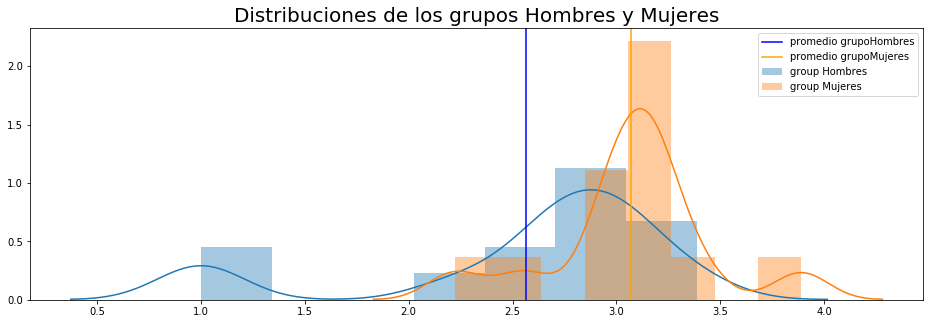

In [27]:
comprobar(l_hombres,l_mujeres,hombres,mujeres,'Hombres','Mujeres')

## Conclusión

Una vez realizada la prueba t-studen en nuestros datos, podemos concluir que, debido a nuestro p value (p = 0.045997789450595634) tenemos información suficiente para rechazar la hipótesis nula y decir que existe evidencua sufuciente para decir que ambos grupos son diferentes, es decir:
##### Sí hubo un comportamiento significativamente diferente entre hombres y mujeres